<h1>Student Sleep Patterns</h1>


<h3>Adding the libraries for this example

In [80]:
#Libraries pentru lucrul cu data
import pandas as pd
import numpy as np
#Libraries pentru afisarea datelor(plotarea lor)
import seaborn as sns
import matplotlib.pyplot as plt
#Librarii pentru antrenarea setului de date
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor


<h3>Vizualizarea setului de date

In [81]:
#salvarea setului de date in df
df = pd.read_csv("student_sleep_patterns.csv")
#o mica vizualizare a setului de date
df.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [83]:
#informatii basic despre setul nostru de date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB


In [82]:
#un sumar statistic al setului nostru de date
df.describe(include='all')

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
unique,NaN,NaN,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Male,3rd Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,186,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,250.500000,21.53600,NaN,NaN,6.472400,5.981600,2.525000,2.462000,62.342000,5.362000,11.166860,12.375860,6.929900,8.988100
std,144.481833,2.33315,NaN,NaN,1.485764,3.475725,0.859414,1.682325,35.191674,2.967249,5.972352,5.789611,1.183174,1.111253
min,1.000000,18.00000,NaN,NaN,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,NaN,NaN,5.100000,2.900000,1.800000,1.000000,32.750000,3.000000,6.087500,7.297500,5.900000,8.047500
50%,250.500000,21.00000,NaN,NaN,6.500000,6.050000,2.600000,2.000000,62.500000,5.000000,10.635000,12.690000,6.885000,9.005000
75%,375.250000,24.00000,NaN,NaN,7.800000,8.800000,3.300000,4.000000,93.250000,8.000000,16.152500,17.327500,7.972500,9.925000


In [84]:
#verificare daca exista elemente lipsa
df.isnull().sum()
#observam ca nu exista elemente lipsa

Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64

In [85]:
lc = LabelEncoder()
df['Gender'] = lc.fit_transform(df['Gender'])
#0-female, 1-Male, 2-Other
df['University_Year'] = lc.fit_transform(df['University_Year'])
#1-first year, 2-second year, 3-third year, 4-fourth year

In [86]:
def convert_time_to_minutes(time):
    hours = int(time)
    minutes = (time - hours) * 60
    return hours * 60 + minutes

df['Weekday_Sleep_End'] = df['Weekday_Sleep_End'].apply(convert_time_to_minutes)
df['Weekday_Sleep_Start'] = df['Weekday_Sleep_Start'].apply(convert_time_to_minutes)
df['Weekend_Sleep_End'] = df['Weekend_Sleep_End'].apply(convert_time_to_minutes)
df['Weekend_Sleep_Start'] = df['Weekend_Sleep_Start'].apply(convert_time_to_minutes)
df.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,2,1,7.7,7.9,3.4,2,37,10,849.6,243.0,444.6,423.6
1,2,21,1,0,6.3,6.0,1.9,5,74,2,523.8,426.0,492.6,612.6
2,3,22,1,3,5.1,6.7,3.9,5,53,5,1200.0,1228.2,412.8,655.2
3,4,24,2,3,6.3,8.6,2.8,4,55,9,1189.2,244.8,401.4,565.2
4,5,20,1,3,4.7,2.7,2.7,0,85,3,1258.8,367.2,538.8,540.6


In [87]:
del df['Student_ID']
df.head()

,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,24,2,1,7.7,7.9,3.4,2,37,10,849.6,243.0,444.6,423.6
1,21,1,0,6.3,6.0,1.9,5,74,2,523.8,426.0,492.6,612.6
2,22,1,3,5.1,6.7,3.9,5,53,5,1200.0,1228.2,412.8,655.2
3,24,2,3,6.3,8.6,2.8,4,55,9,1189.2,244.8,401.4,565.2
4,20,1,3,4.7,2.7,2.7,0,85,3,1258.8,367.2,538.8,540.6


<h3>EDA

     Age  Gender  University_Year  Sleep_Duration  Study_Hours  Screen_Time  \
0     24       2                1             7.7          7.9          3.4   
1     21       1                0             6.3          6.0          1.9   
2     22       1                3             5.1          6.7          3.9   
3     24       2                3             6.3          8.6          2.8   
4     20       1                3             4.7          2.7          2.7   
..   ...     ...              ...             ...          ...          ...   
495   24       1                1             5.1          9.3          1.9   
496   20       1                1             8.9          7.7          3.5   
497   21       1                2             5.7          6.4          3.9   
498   18       0                1             4.9          0.5          3.5   
499   21       1                2             7.9         11.6          1.0   

     Caffeine_Intake  Physical_Activity  Sleep_Qual

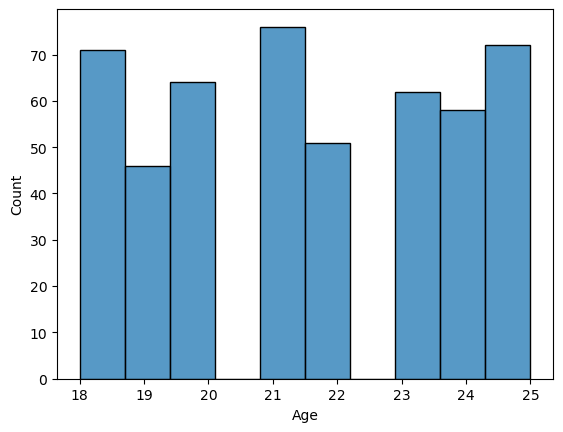

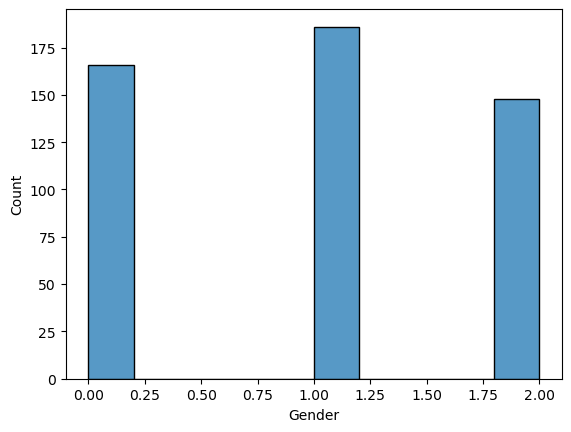

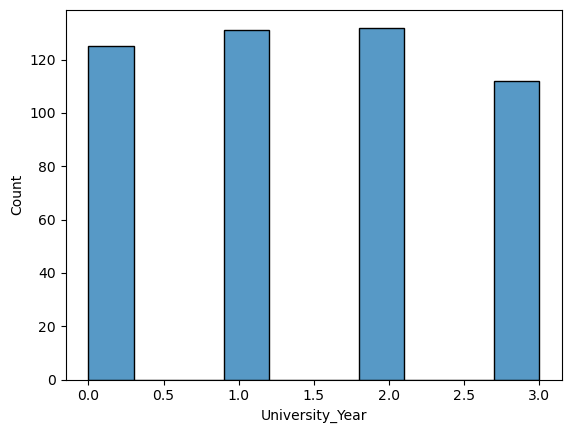

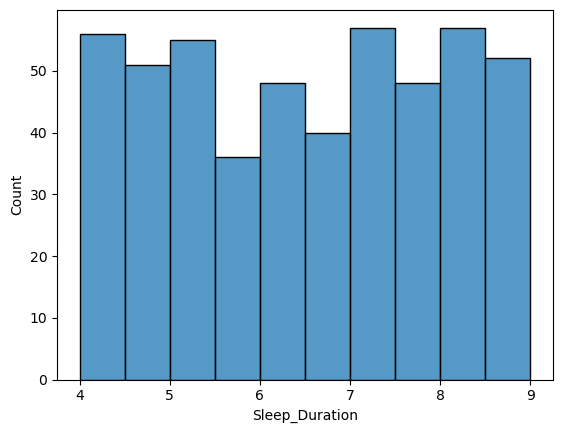

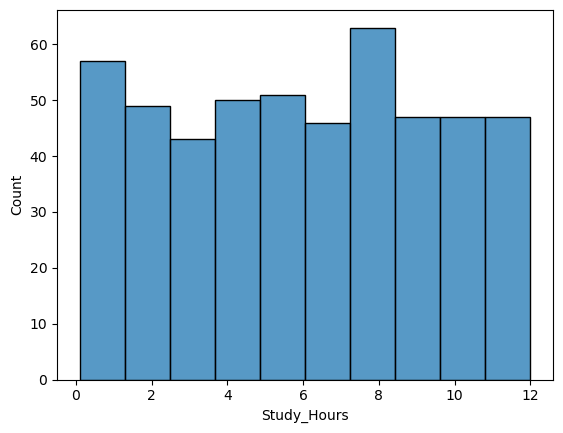

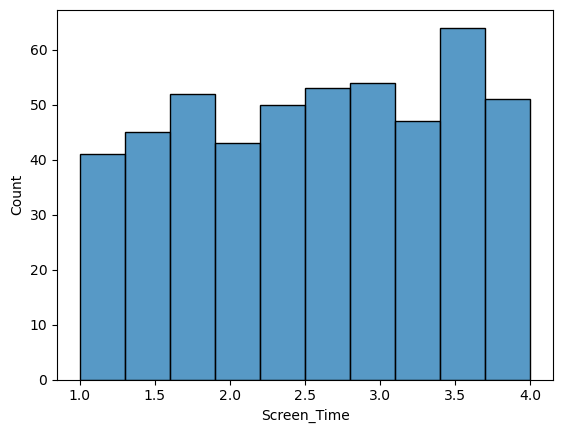

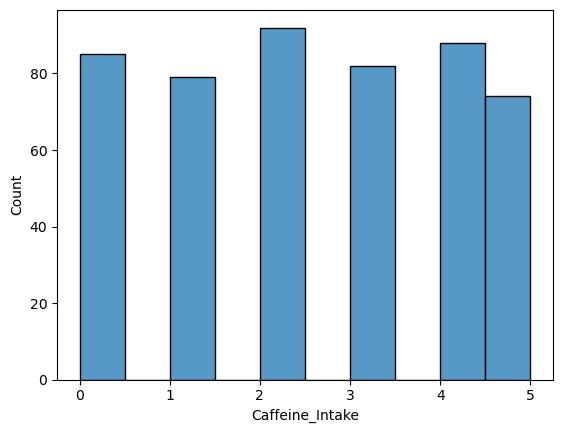

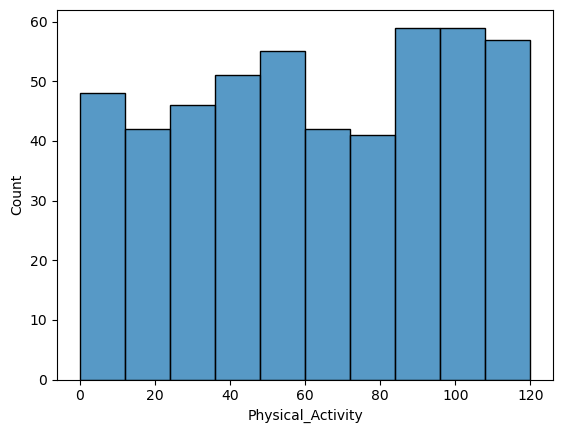

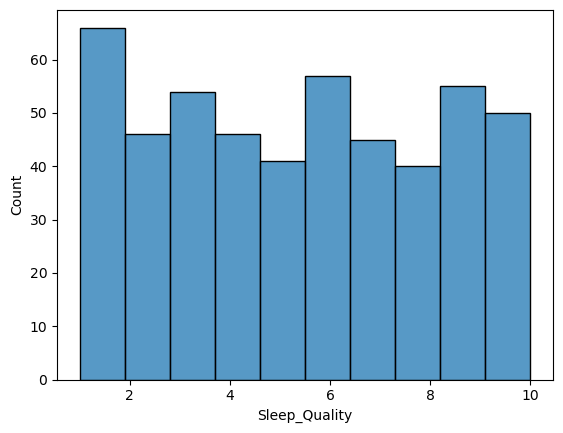

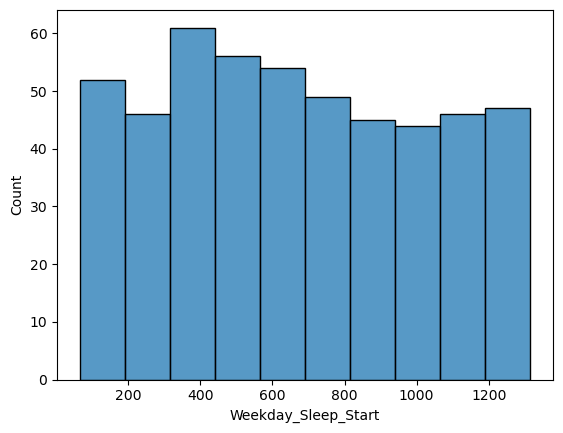

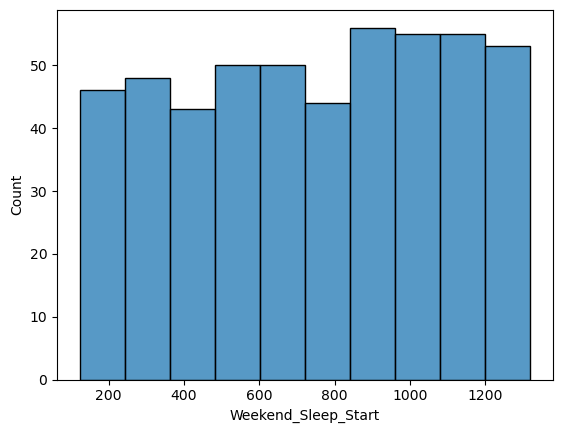

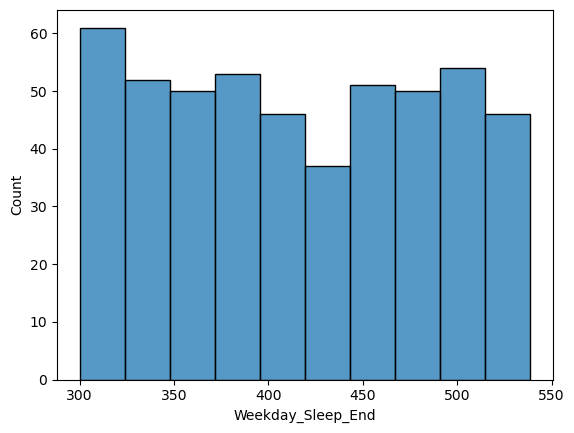

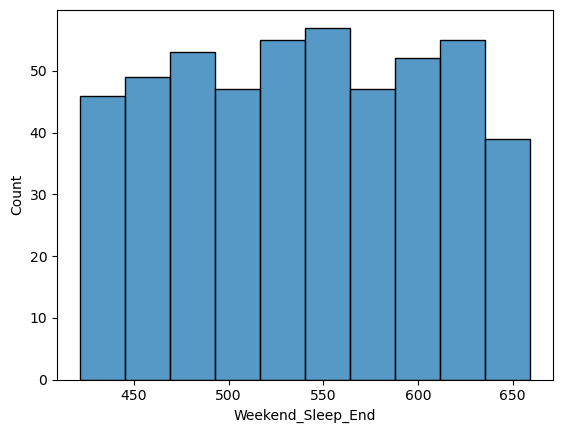

In [ ]:
#Plotarea distributiei fiecarei coloane numerice

#luam coloanele numerice din 
coloane_numerice = df.select_dtypes(include=[np.number])
for col in coloane_numerice:
    sns.histplot(df[col])
    plt.show()
